### Treść zadania

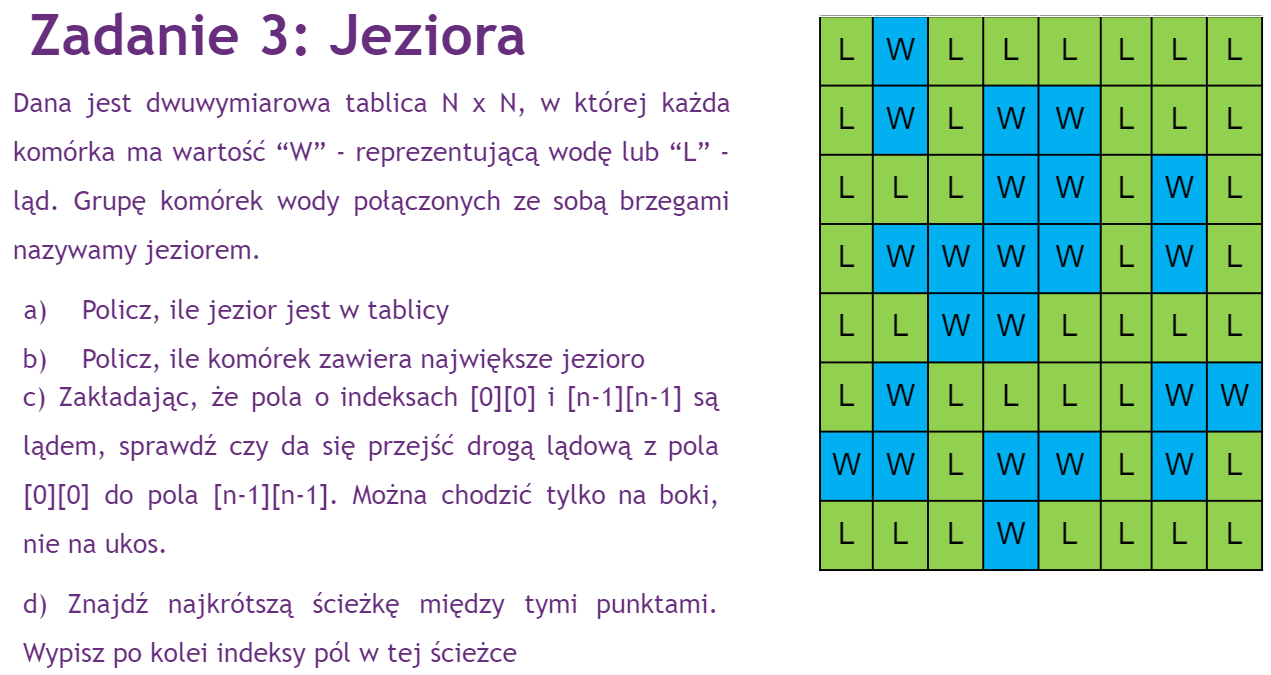

### Omówienie algorytmu

###### a) Liczenie jezior w tablicy:
Można użyć zarówno DFS jak i BFS. Zawsze, gdy mamy taki wybór, możemy postąpić dowolnie, ponieważ DFS wymaga zapamiętywania wywołań rekurencyjnych (lub użycia stosu), a BFS wymaga użycia kolejki.
###### b) Liczenie komórek największego jeziora:
Można użyć zarówno DFS jak i BFS.
###### c) Sprawdzanie, czy da się dojść do celu:
Najlepiej użyć DFS, ponieważ sprawdzamy tylko, czy da się dotrzeć, więc istnieje większa szansa, że DFS dotrze najpierw, bez konieczności sprawdzania wszystkiego po drodze. Jeżeli byśmy chcieli dotrzeć gdzieś blisko, mając dużo możliwych dróg, prawdopodobnie BFS znalazłby szybciej ścieżkę, ale DFS w przypadku z zadania się lepiej sprawdzi.
###### d) Najkrótsza ścieżka do celu:
Tylko BFS. DFS dałoby się przerobić tak, by zliczał długości ścieżek, ale po co, jak BFS zawsze idzie krok po kroku wszystkimi możliwymi ścieżkami, więc napewno dotrze do celu najkrótszą ścieżką.

###### UWAGA:
W poniższych implementacjach reprezentuję teren (macierz z jeziorami i lądem), przy pomocy macierzy zer i jedynek, w której 0 oznacza ląd, a 1 - jezioro.

## a) Liczenie jezior w tablicy

### Złożoność

###### Obliczeniowa:
$ O(N^2) $
###### Pamięciowa:
$ O(N^2) $

### Implementacja

In [1]:
def count_lakes(M: 'square matrix representing terrain'):
    n = len(M)
    visited = [[False] * n for _ in range(n)]
    counter = 0
    
    def visit_lake(i, j):
        visited[i][j] = True
        if i > 0 and M[i - 1][j] and not visited[i - 1][j]:
            visit_lake(i - 1, j)
        if i < n - 1 and M[i + 1][j] and not visited[i + 1][j]:
            visit_lake(i + 1, j)
        if j > 0 and M[i][j - 1] and not visited[i][j - 1]:
            visit_lake(i, j - 1)
        if j < n - 1 and M[i][j + 1] and not visited[i][j + 1]:
            visit_lake(i, j + 1)
    
    for i in range(n):
        for j in range(n):
            if M[i][j] and not visited[i][j]:
                visit_lake(i, j)
                counter += 1
    
    return counter

###### Kilka testów

In [2]:
M = [list(map(int, line)) for line in '''
01000000
01011000
00011010
01111010
00110000
01000011
11011010
00010000
'''.strip().splitlines()]

print(*M, sep='\n')
print('Number of lakes:', count_lakes(M))

[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
Number of lakes: 6


## b) Liczba komórek, jakie zawiera największe jezioro

### Złożoność

###### Obliczeniowa:
$ O(N^2) $
###### Pamięciowa:
$ O(N^2) $

### Implementacja

In [3]:
def visit_lake(M, i, j, visited):
    n = len(M)
    counter = 0
    
    def dfs_visit(i, j):
        nonlocal counter
        counter += 1
        visited[i][j] = True
        if i > 0 and M[i - 1][j] and not visited[i - 1][j]:
            dfs_visit(i - 1, j)
        if i < n - 1 and M[i + 1][j] and not visited[i + 1][j]:
            dfs_visit(i + 1, j)
        if j > 0 and M[i][j - 1] and not visited[i][j - 1]:
            dfs_visit(i, j - 1)
        if j < n - 1 and M[i][j + 1] and not visited[i][j + 1]:
            dfs_visit(i, j + 1)
    
    dfs_visit(i, j)
    
    return counter
    

def largest_lake(M: 'square matrix representing terrain'):
    n = len(M)
    visited = [[False] * n for _ in range(n)]
    largest = 0
    
    for i in range(n):
        for j in range(n):
            if M[i][j] and not visited[i][j]:
                largest = max(largest, visit_lake(M, i, j, visited))
    
    return largest

###### Kilka testów

In [4]:
M = [list(map(int, line)) for line in '''
01000000
01011000
00011010
01111010
00110000
01000011
11011010
00010000
'''.strip().splitlines()]

print(*M, sep='\n')
print('Size of largest lake:', largest_lake(M))

[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
Size of largest lake: 10


## c) Sprawdzanie, czy da się dotrzeć

### Złożoność

###### Obliczeniowa:
$ O(N^2) $
###### Pamięciowa:
$ O(N^2) $

### Implementacja

In [5]:
def is_path(M: 'matrix representing terrain',
            begin: 'coordinates of beginning point',
            target: 'coordiantes of target point'):
    # If begin field or target field is water, return False as we cannot go through water
    if M[begin[0]][begin[1]] or M[target[0]][target[1]]:
        return False
    
    n = len(M)
    visited = [[False] * n for _ in range(n)]
    
    def dfs_visit(i, j):
        visited[i][j] = True
        if i == target[0] and j == target[1]:
            return True
        if i > 0 and not M[i - 1][j] and not visited[i - 1][j]:
            if dfs_visit(i - 1, j): return True
        if i < n - 1 and not M[i + 1][j] and not visited[i + 1][j]:
            if dfs_visit(i + 1, j): return True
        if j > 0 and not M[i][j - 1] and not visited[i][j - 1]:
            if dfs_visit(i, j - 1): return True
        if j < n - 1 and not M[i][j + 1] and not visited[i][j + 1]:
            if dfs_visit(i, j + 1): return True
        return False
        
    return dfs_visit(*begin)

###### Kilka testów

In [6]:
M = [list(map(int, line)) for line in '''
01000000
01011000
00011010
01111010
00110000
01000011
11011010
00010000
'''.strip().splitlines()]

n = len(M)
print(*M, sep='\n')
print('Does path exist?:', is_path(M, (0, 0), (n - 1, n - 1)))
print('Does path exist?:', is_path(M, (n - 1, 0), (n - 1, n - 1)))
print('Does path exist?:', is_path(M, (4, 1), (5, 3)))
print('Does path exist?:', is_path(M, (4, 2), (5, 3)))

[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
Does path exist?: True
Does path exist?: True
Does path exist?: True
Does path exist?: False


## d) Najkrótsza ścieżka między punktami

### Złożoność

###### Obliczeniowa:
$ O(N^2) $
###### Pamięciowa:
$ O(N^2) $

### Implementacja

In [7]:
from queue import Queue


def shortest_path(M: 'matrix representing terrain',
                  begin: 'coordinates of beginning point',
                  target: 'coordiantes of target point'):
    # If begin field or target field is water, return -1 as we cannot go through water
    if M[begin[0]][begin[1]] or M[target[0]][target[1]]:
        return None
    
    n = len(M)
    parent  = [[()] * n for _ in range(n)]  # Array to hold where we came from
    parent[begin[0]][begin[1]] = begin
    q = Queue()
    q.put(begin)
    found_path = False
    
    while not q.empty():
        i, j = q.get()
        if i == target[0] and j == target[1]:
            found_path = True
            break
        if i > 0 and not M[i - 1][j] and not parent[i - 1][j]:
            q.put((i - 1, j))
            parent[i - 1][j] = (i, j)
        if i < n - 1 and not M[i + 1][j] and not parent[i + 1][j]:
            q.put((i + 1, j))
            parent[i + 1][j] = (i, j)
        if j > 0 and not M[i][j - 1] and not parent[i][j - 1]:
            q.put((i, j - 1))
            parent[i][j - 1] = (i, j)
        if j < n - 1 and not M[i][j + 1] and not parent[i][j + 1]:
            q.put((i, j + 1))
            parent[i][j + 1] = (i, j)
            
    parent[begin[0]][begin[1]] = None
    
    # Restore path (a path will be stored in a reversed order)
    if found_path:
        i, j = target
        path = [(i, j)]
        while parent[i][j]:
            i, j = parent[i][j]
            path.append((i, j))
        
        n = len(path)
        for i in range(n // 2):
            path[i], path[n - i - 1] = path[n - i - 1], path[i]
        return path
        
    return None

###### Kilka testów

In [8]:
M = [list(map(int, line)) for line in '''
01000000
01011000
00011010
01111010
00110000
01000011
11011010
00010000
'''.strip().splitlines()]

n = len(M)
print(*M, sep='\n')
print('Shortest path:', shortest_path(M, (0, 0), (n - 1, n - 1)))
print('Shortest path:', shortest_path(M, (n - 1, 0), (n - 1, n - 1)))
print('Shortest path:', shortest_path(M, (4, 1), (5, 3)))
print('Shortest path:', shortest_path(M, (4, 2), (5, 3)))

[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
Shortest path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7)]
Shortest path: [(7, 0), (7, 1), (7, 2), (6, 2), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7)]
Shortest path: [(4, 1), (4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3)]
Shortest path: None
